<a href="https://colab.research.google.com/github/taylan-sen/CIS490b_computer_vision/blob/main/classification_class_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Classification
The notebook will go over:
* decision tree classifier
* linear classifier
* nearest neighbor classifier
  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist # this is the source of the data
print('modules loaded')

modules loaded


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# get the brightness of all samples at once.
brightness_train = X_train.sum(axis=(1,2))
print(type(brightness_train))
print(brightness_train.shape)
print(brightness_train[0:5])
print(y_train[0:5])


<class 'numpy.ndarray'>
(60000,)
[27525 31095 19443 17135 23214]
[5 0 4 1 9]


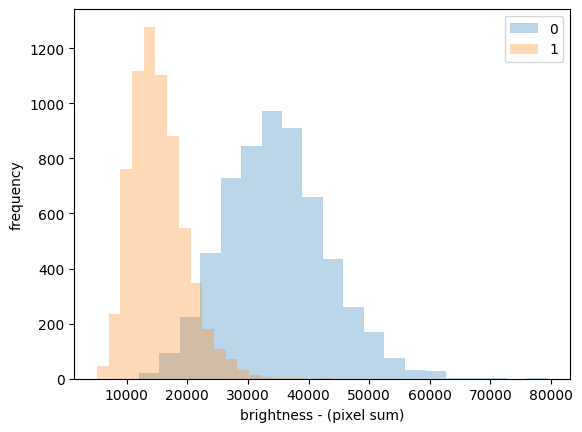

In [ ]:
plt.hist(brightness_train[y_train==0], alpha=0.3, label=str(0), bins=20)
plt.hist(brightness_train[y_train==1], alpha=0.3, label=str(1), bins=20)
plt.legend()
plt.xlabel('brightness - (pixel sum)')
plt.ylabel('frequency')
plt.show()

* The size of the overlap of the orange and blue regions above represents cases in which an image would be misclassified.

A decision tree is a step by step classifier; at each step one of the input dimensions is compared to a threshold. In the last class, we created a 1 variable decision tree for classifying 0's and 1's based on brightness.

In [ ]:
# build 1d decision tree classifier
def decision_tree_1d(input_ndarray, thresh):
  print('input shape', input_ndarray.shape)
  y_classification = (input_ndarray < thresh).astype(int)
  return y_classification

In [ ]:
# test classifier
brightness_test = X_test.sum(axis=(1,2))
classifier_result = decision_tree_1d(brightness_test, 22000)
# create index arrays
zero_images = y_test == 0
one_images  = y_test == 1
tot_images = zero_images | one_images # logical or
incorrect = classifier_result[tot_images] != y_test[tot_images]
print('# incorrect:', incorrect.sum())
print('% accuracy:', (tot_images.shape[0]-incorrect.sum())/tot_images.shape[0]*100)
print(classifier_result[zero_images][0:5])
print(classifier_result[one_images][0:5])
misclassified_zeros = classifier_result[zero_images] != y_test[zero_images]
print('# misclassified_zeros',misclassified_zeros.sum())

misclassified_ones = classifier_result[one_images] != y_test[one_images]
print('# misclassified_ones',misclassified_ones.sum())
print('confusion matrix:')
print('   \t0\t1')
s = '0:\t' + str(zero_images.sum() -misclassified_zeros.sum())
s += '\t' + str(misclassified_zeros.sum())
print(s)
s = '1:\t' + str(misclassified_ones.sum())
s += '\t' + str(one_images.sum() -misclassified_ones.sum())
print(s)


input shape (10000,)
# incorrect: 147
% accuracy: 98.53
[0 0 0 0 0]
[1 1 1 1 1]
# misclassified_zeros 57
# misclassified_ones 90
confusion matrix:
   	0	1
0:	923	57
1:	90	1045


zero_mean_img.shape (28, 28)


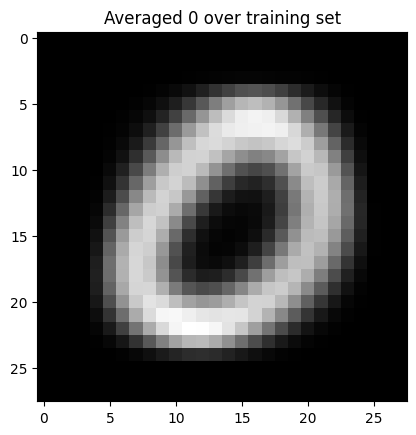

In [ ]:
zero_images = y_train == 0
zero_mean_img = X_train[zero_images].mean(axis=0)
print('zero_mean_img.shape', zero_mean_img.shape)
plt.imshow(zero_mean_img, cmap='gray')
plt.title('Averaged 0 over training set')
plt.show()


zero_difference.shape (60000, 28, 28)
zero_distance.shape (60000,)


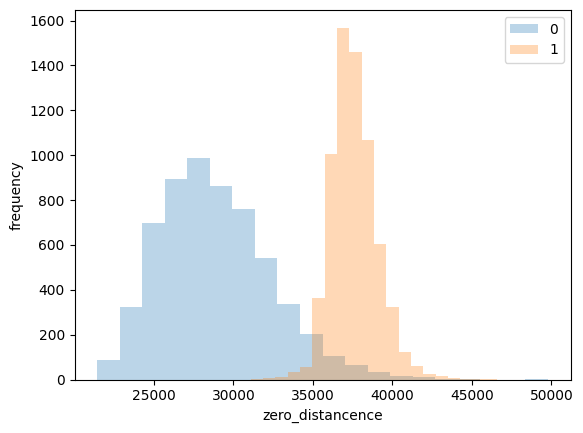

In [ ]:
zero_difference = np.abs(X_train - zero_mean_img)
zero_dist_train = zero_difference.sum(axis=(1,2))
print('zero_difference.shape', zero_difference.shape)
print('zero_distance.shape', zero_dist_train.shape)

plt.hist(zero_dist_train[y_train==0], alpha=0.3, label=str(0), bins=20)
plt.hist(zero_dist_train[y_train==1], alpha=0.3, label=str(1), bins=20)
plt.legend()
plt.xlabel('zero_distancence')
plt.ylabel('frequency')
plt.show()


Lets build a classifier that looks at both zero_distance and brightness. Which one first? Can we, should we look at them at the same time?

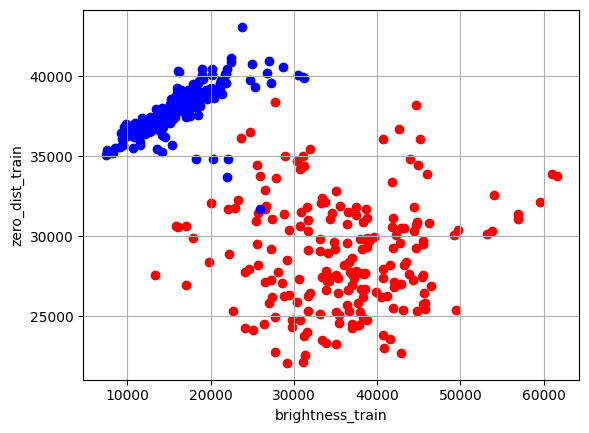

In [ ]:
plt.scatter(brightness_train[y_train == 0][0:200], zero_dist_train[y_train == 0][0:200],c='red')
plt.scatter(brightness_train[y_train == 1][0:200], zero_dist_train[y_train == 1][0:200],c='blue')
plt.xlabel('brightness_train')
plt.ylabel('zero_dist_train')
plt.grid(True)
plt.show()

In [ ]:
# build 2d decision tree classifier
def decision_tree_2d(input0_ndarray, input1_ndarray):
  print('input0 shape', input0_ndarray.shape)
  print('input1 shape', input1_ndarray.shape)
  #y_classification = (input_ndarray < thresh).astype(int)
  y_classification = []
  for i in range(input0_ndarray.shape[0]):
    if input0_ndarray[i] < 22000:
      if input1_ndarray[i] < 33000:
        y = 0
      else:
        y = 1
    else:
      if input1_ndarray[i] < 39000:
        y = 0
      else:
        y = 1
    y_classification.append(y)

  return np.array(y_classification)

In [ ]:
# test classifier
brightness_test = X_test.sum(axis=(1,2))
zero_difference = np.abs(X_test - zero_mean_img)
zero_dist_test = zero_difference.sum(axis=(1,2))

classifier_result = decision_tree_2d(brightness_test, zero_dist_test)
# create index arrays
zero_images = y_test == 0
one_images  = y_test == 1
tot_images = zero_images | one_images # logical or
incorrect = classifier_result[tot_images] != y_test[tot_images]
print(type(incorrect))
print('# incorrect:', incorrect.sum())
print('% accuracy:', (tot_images.shape[0]-incorrect.sum())/tot_images.shape[0]*100)
print(classifier_result[zero_images][0:5])
print(classifier_result[one_images][0:5])
misclassified_zeros = classifier_result[zero_images] != y_test[zero_images]
print('# misclassified_zeros',misclassified_zeros.sum())

misclassified_ones = classifier_result[one_images] != y_test[one_images]
print('# misclassified_ones',misclassified_ones.sum())
print('confusion matrix:')
print('   \t0\t1')
s = '0:\t' + str(zero_images.sum() -misclassified_zeros.sum())
s += '\t' + str(misclassified_zeros.sum())
print(s)
s = '1:\t' + str(misclassified_ones.sum())
s += '\t' + str(one_images.sum() -misclassified_ones.sum())
print(s)


input0 shape (10000,)
input1 shape (10000,)
<class 'numpy.ndarray'>
# incorrect: 18
% accuracy: 99.82
[0 0 0 0 0]
[1 1 1 1 1]
# misclassified_zeros 5
# misclassified_ones 13
confusion matrix:
   	0	1
0:	975	5
1:	13	1122


In [ ]:
# Nearest neighbor

def nearest_neighbor(input0_train, input1_train, input0_test, input1_test):
  # cycle through every point in the test set
  y_classification = []
  zero_images = y_train == 0
  one_images  = y_train == 1
  tot_images = zero_images | one_images # logical or

  for i in range(input0_test.shape[0]):
    delta0_train = input0_train[tot_images] - input0_test[i]
    delta1_train = input1_train[tot_images] - input1_test[i]
    dist_train = np.square(delta0_train) + np.square(delta1_train)
    closest_point = np.argmin(dist_train)
    y_classification.append(y_train[tot_images][closest_point])

  return np.array(y_classification)

In [ ]:
# test nearest neighbor classifier
brightness_test = X_test.sum(axis=(1,2))
zero_difference = np.abs(X_test - zero_mean_img)
zero_dist_test = zero_difference.sum(axis=(1,2))

brightness_train = X_train.sum(axis=(1,2))
zero_difference = np.abs(X_train - zero_mean_img)
zero_dist_train = zero_difference.sum(axis=(1,2))

classifier_result = nearest_neighbor(brightness_train, zero_dist_train,
                                     brightness_test, zero_dist_test)
# create index arrays
zero_images = y_test == 0
one_images  = y_test == 1
tot_images = zero_images | one_images # logical or
incorrect = classifier_result[tot_images] != y_test[tot_images]
print(type(incorrect))
print('# incorrect:', incorrect.sum())
print('% accuracy:', (tot_images.shape[0]-incorrect.sum())/tot_images.shape[0]*100)
print(classifier_result[zero_images][0:5])
print(classifier_result[one_images][0:5])
misclassified_zeros = classifier_result[zero_images] != y_test[zero_images]
print('# misclassified_zeros',misclassified_zeros.sum())

misclassified_ones = classifier_result[one_images] != y_test[one_images]
print('# misclassified_ones',misclassified_ones.sum())
print('confusion matrix:')
print('   \t0\t1')
s = '0:\t' + str(zero_images.sum() -misclassified_zeros.sum())
s += '\t' + str(misclassified_zeros.sum())
print(s)
s = '1:\t' + str(misclassified_ones.sum())
s += '\t' + str(one_images.sum() -misclassified_ones.sum())
print(s)


<class 'numpy.ndarray'>
# incorrect: 18
% accuracy: 99.82
[0 0 0 0 0]
[1 1 1 1 1]
# misclassified_zeros 11
# misclassified_ones 7
confusion matrix:
   	0	1
0:	969	11
1:	7	1128


## Linear Classifier

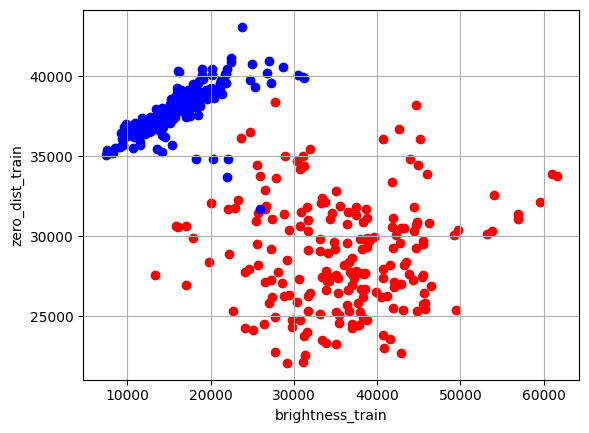

In [ ]:
# linear classifier
plt.scatter(brightness_train[y_train == 0][0:200], zero_dist_train[y_train == 0][0:200],c='red')
plt.scatter(brightness_train[y_train == 1][0:200], zero_dist_train[y_train == 1][0:200],c='blue')
plt.xlabel('brightness_train')
plt.ylabel('zero_dist_train')
plt.grid(True)
plt.show()

From this plot, we can estimate that the y-intercept (zero_dist intercept, or "b") is 24000.
We can also estimate a slope of 45 degrees which is 5000/10000 = 0.5 (m = 0.5)
Thus, our line threshold equation becomes
y = mx + b
y = (0.5)x + 27000
zero_dist = (0.5) * (brightness) + 24000

and rearranging:

0 = (0.5) * brightness - zero_dist + 24000

This gives values right on the line.

If the value on the right is positive, we can classify as zero and one otherwise. Lets see what this decision surface looks like.

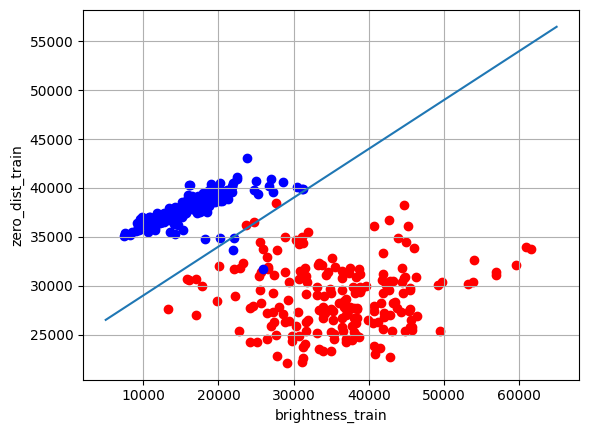

In [ ]:
plt.scatter(brightness_train[y_train == 0][0:200], zero_dist_train[y_train == 0][0:200],c='red')
plt.scatter(brightness_train[y_train == 1][0:200], zero_dist_train[y_train == 1][0:200],c='blue')
x_values = np.linspace(5000, 65000,200)
y_values = 0.5* x_values +24000
plt.plot(x_values, y_values)
plt.xlabel('brightness_train')
plt.ylabel('zero_dist_train')
plt.grid(True)
plt.show()

In [ ]:
# build a linear classifier
def linear_classifier(input0_ndarray, input1_ndarray):
  y_classification = (0.5*input0_ndarray - input1_ndarray + 24000).astype(int) < 0

  return y_classification

In [ ]:
# test classifier
brightness_test = X_test.sum(axis=(1,2))
zero_difference = np.abs(X_test - zero_mean_img)
zero_dist_test = zero_difference.sum(axis=(1,2))

classifier_result = linear_classifier(brightness_test, zero_dist_test)
# create index arrays
zero_images = y_test == 0
one_images  = y_test == 1
tot_images = zero_images | one_images # logical or
incorrect = classifier_result[tot_images] != y_test[tot_images]
print(type(incorrect))
print('# incorrect:', incorrect.sum())
print('% accuracy:', (tot_images.shape[0]-incorrect.sum())/tot_images.shape[0]*100)
print(classifier_result[zero_images][0:5])
print(classifier_result[one_images][0:5])
misclassified_zeros = classifier_result[zero_images] != y_test[zero_images]
print('# misclassified_zeros',misclassified_zeros.sum())

misclassified_ones = classifier_result[one_images] != y_test[one_images]
print('# misclassified_ones',misclassified_ones.sum())
print('confusion matrix:')
print('   \t0\t1')
s = '0:\t' + str(zero_images.sum() -misclassified_zeros.sum())
s += '\t' + str(misclassified_zeros.sum())
print(s)
s = '1:\t' + str(misclassified_ones.sum())
s += '\t' + str(one_images.sum() -misclassified_ones.sum())
print(s)


<class 'numpy.ndarray'>
# incorrect: 13
% accuracy: 99.87
[False False False False False]
[ True  True  True  True  True]
# misclassified_zeros 6
# misclassified_ones 7
confusion matrix:
   	0	1
0:	974	6
1:	7	1128
